In [7]:
import utils
import metrics
import PCA
import SVM
import matplotlib.pyplot as plt
import numpy as np

In [28]:

def plotDCFpoly(x, y, xlabel):
    plt.figure()
    plt.plot(x, y[0:len(x)], label='min DCF prior=0.5 - c=0', color='b')
    plt.plot(x, y[len(x): 2*len(x)], label='min DCF prior=0.5 - c=1', color='r')
    plt.plot(x, y[2*len(x): 3*len(x)], label='min DCF prior=0.5 - c=10', color='g')
    plt.plot(x, y[3*len(x): 4*len(x)], label='min DCF prior=0.5 - c=30', color='m')

    
    plt.xlim([1e-5, 1e-1])
    plt.xscale("log")
    plt.legend(["min DCF prior=0.5 - c=0", "min DCF prior=0.5 - c=1", 
                'min DCF prior=0.5 - c=10', 'min DCF prior=0.5 - c=30'])
    plt.xlabel(xlabel)
    plt.ylabel("min DCF")
    return

In [8]:
priors = [0.5]
D, L = utils.load('Train.txt')
ZD, mean, standardDeviation = utils.ZNormalization(D)
c = [0, 1, 10, 30]
C=np.logspace(-5, -1, num=15)
model = SVM.SVM()
PCA7 = PCA.PCA(ZD, L, 7)
PCA6 = PCA.PCA(ZD, L, 6)

print ("Executing polynomial SVM with no re-balancing")

Executing polynomial SVM with no re-balancing


In [9]:
# SINGLE FOLD Z NORMALIZED POLYNOMIAL SVM 
(DTRSF, LTRSF), (DEVSF, LEVSF) = utils.split_db_singleFold(ZD, L)
minDCF = []
print("Start polynomial SVM on single fold of z normalized features")

for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for clittle in c:
        print("")
        print("Evaluating value of c:", clittle)
        for value in C:
            model.train(DTRSF, LTRSF, option='polynomial', c = clittle, d = 2 ,C=value) 
            temp = metrics.minimum_detection_costs(model.predictAndGetScores(DEVSF), LEVSF, priors[i], 1, 1)
            minDCF.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start polynomial SVM on single fold of z normalized features

Working on application with prior: 0.5

Evaluating value of c: 0
For C= 1e-05 the minDCF is 1.0
For C= 1.9306977288832496e-05 the minDCF is 0.25006003614808076
For C= 3.727593720314938e-05 the minDCF is 0.251687963700249
For C= 7.196856730011514e-05 the minDCF is 0.25643524311480176
For C= 0.00013894954943731373 the minDCF is 0.263144124672961
For C= 0.00026826957952797245 the minDCF is 0.2739936045703308
For C= 0.0005179474679231213 the minDCF is 0.27101075594989826
For C= 0.001 the minDCF is 0.27751488264512947
For C= 0.0019306977288832496 the minDCF is 0.28178692855066423
For C= 0.003727593720314938 the minDCF is 0.28402406501598854
For C= 0.007196856730011514 the minDCF is 0.29578735828309255
For C= 0.013894954943731374 the minDCF is 0.30293987537759576
For C= 0.026826957952797246 the minDCF is 0.31710587848683625
For C= 0.05179474679231207 the minDCF is 0.2952438731530985
For C= 0.1 the minDCF is 0.29147865872925594

Ev

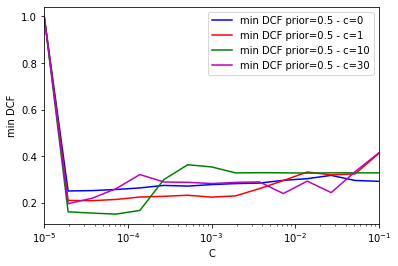

In [29]:
plotDCFpoly(C, minDCF, "C")

In [11]:
# SINGLE FOLD Z NORMALIZED POLYNOMIAL SVM WITH PCA = 7
(DTRSF, LTRSF), (DEVSF, LEVSF) = utils.split_db_singleFold(PCA7, L)
minDCF7 = []
print("Start polynomial SVM on single fold of z normalized features with PCA=7")

for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for clittle in c:
        print("")
        print("Evaluating value of c:", clittle)
        for value in C:
            model.train(DTRSF, LTRSF, option='polynomial', c = clittle, d = 2 ,C=value) 
            temp = metrics.minimum_detection_costs(model.predictAndGetScores(DEVSF), LEVSF, priors[i], 1, 1)
            minDCF7.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start polynomial SVM on single fold of z normalized features with PCA=7

Working on application with prior: 0.5

Evaluating value of c: 0
For C= 1e-05 the minDCF is 1.0
For C= 1.9306977288832496e-05 the minDCF is 0.25006003614808076
For C= 3.727593720314938e-05 the minDCF is 0.251687963700249
For C= 7.196856730011514e-05 the minDCF is 0.25616223663089777
For C= 0.00013894954943731373 the minDCF is 0.263246502104425
For C= 0.00026826957952797245 the minDCF is 0.27405932835349284
For C= 0.0005179474679231213 the minDCF is 0.27101075594989826
For C= 0.001 the minDCF is 0.2763963144124673
For C= 0.0019306977288832496 the minDCF is 0.2821597846282182
For C= 0.003727593720314938 the minDCF is 0.28402406501598854
For C= 0.007196856730011514 the minDCF is 0.29466879005043034
For C= 0.013894954943731374 the minDCF is 0.30293987537759576
For C= 0.026826957952797246 the minDCF is 0.3141230298664038
For C= 0.05179474679231207 the minDCF is 0.2952438731530985
For C= 0.1 the minDCF is 0.290089611850

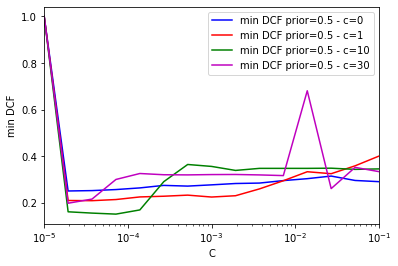

In [30]:
plotDCFpoly(C, minDCF7, "C")

In [23]:
# SINGLE FOLD Z POLYNOMIAL SVM WITH PCA = 6
(DTRSF, LTRSF), (DEVSF, LEVSF) = utils.split_db_singleFold(PCA6, L)
minDCF6 = []
print("Start polynomial SVM on single fold of z normalized features with PCA=6")

for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for clittle in c:
        print("")
        print("Evaluating value of c:", clittle)
        for value in C:
            model.train(DTRSF, LTRSF, option='polynomial', c = clittle, d = 2 ,C=value) 
            temp = metrics.minimum_detection_costs(model.predictAndGetScores(DEVSF), LEVSF, priors[i], 1, 1)
            minDCF6.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start polynomial SVM on single fold of z normalized features with PCA=6

Working on application with prior: 0.5

Evaluating value of c: 0
For C= 1e-05 the minDCF is 1.0
For C= 1.9306977288832496e-05 the minDCF is 0.25182446694220095
For C= 3.727593720314938e-05 the minDCF is 0.2528065319329112
For C= 7.196856730011514e-05 the minDCF is 0.25690794878600587
For C= 0.00013894954943731373 the minDCF is 0.26239841251785284
For C= 0.00026826957952797245 the minDCF is 0.2747393167254389
For C= 0.0005179474679231213 the minDCF is 0.27101075594989826
For C= 0.001 the minDCF is 0.2778877387226836
For C= 0.0019306977288832496 the minDCF is 0.2828713709728384
For C= 0.003727593720314938 the minDCF is 0.2847697771710967
For C= 0.007196856730011514 the minDCF is 0.29504164612798445
For C= 0.013894954943731374 the minDCF is 0.3021941632224876
For C= 0.026826957952797246 the minDCF is 0.3133773177112956
For C= 0.05179474679231207 the minDCF is 0.29710815354086884
For C= 0.1 the minDCF is 0.28968262996

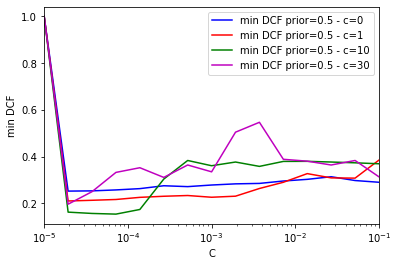

In [31]:
plotDCFpoly(C, minDCF6, "C")

In [33]:
minDCF3fold = []
print("Start linear SVM with 3-fold on z normalized features")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for clittle in c:
        print("")
        print("Evaluating value of c:", clittle)
        for value in C:
            temp = utils.KfoldSVM(ZD, L, model, option='polynomial', c = clittle, d = 2 ,C=value, prior=priors[i])
            minDCF3fold.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start linear SVM with 3-fold on z normalized features

Working on application with prior: 0.5

Evaluating value of c: 0
For C= 1e-05 the minDCF is 1.0
For C= 1.9306977288832496e-05 the minDCF is 0.2792872191923883
For C= 3.727593720314938e-05 the minDCF is 0.2833582262332653
For C= 7.196856730011514e-05 the minDCF is 0.2852863054093641
For C= 0.00013894954943731373 the minDCF is 0.2928097656090953
For C= 0.00026826957952797245 the minDCF is 0.29903917563008886
For C= 0.0005179474679231213 the minDCF is 0.306810237675235
For C= 0.001 the minDCF is 0.31228452216524805
For C= 0.0019306977288832496 the minDCF is 0.31496727614081277
For C= 0.003727593720314938 the minDCF is 0.31906833194933715
For C= 0.007196856730011514 the minDCF is 0.32869054832540473
For C= 0.013894954943731374 the minDCF is 0.33340880582140786
For C= 0.026826957952797246 the minDCF is 0.336014634951795
For C= 0.05179474679231207 the minDCF is 0.33983758941574227
For C= 0.1 the minDCF is 0.33100280099587626

Evaluating 

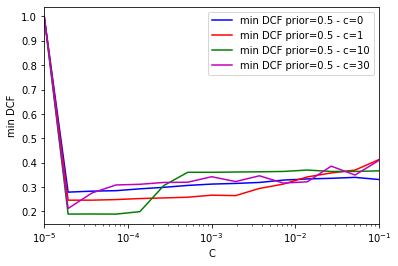

In [34]:
plotDCFpoly(C, minDCF3fold, "C")

In [35]:
minDCF3fold7 = []
print("Start linear SVM with 3-fold on z normalized features with PCA=7")

for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for clittle in c:
        print("")
        print("Evaluating value of c:", clittle)
        for value in C:
            temp = utils.KfoldSVM(PCA7, L, model, option='polynomial', c = clittle, d = 2 ,C=value, prior=priors[i])
            minDCF3fold7.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start linear SVM with 3-fold on z normalized features with PCA=7

Working on application with prior: 0.5

Evaluating value of c: 0
For C= 1e-05 the minDCF is 1.0
For C= 1.9306977288832496e-05 the minDCF is 0.2789171686188099
For C= 3.727593720314938e-05 the minDCF is 0.2833582262332653
For C= 7.196856730011514e-05 the minDCF is 0.28516295521817137
For C= 0.00013894954943731373 the minDCF is 0.2924397150355169
For C= 0.00026826957952797245 the minDCF is 0.29903917563008886
For C= 0.0005179474679231213 the minDCF is 0.30654806217751096
For C= 0.001 the minDCF is 0.31251574743229527
For C= 0.0019306977288832496 the minDCF is 0.31422717499365593
For C= 0.003727593720314938 the minDCF is 0.31919168214052995
For C= 0.007196856730011514 the minDCF is 0.32907607401432154
For C= 0.013894954943731374 the minDCF is 0.3323755789458502
For C= 0.026826957952797246 the minDCF is 0.3367547360989518
For C= 0.05179474679231207 the minDCF is 0.33911296338392394
For C= 0.1 the minDCF is 0.3323751282143354

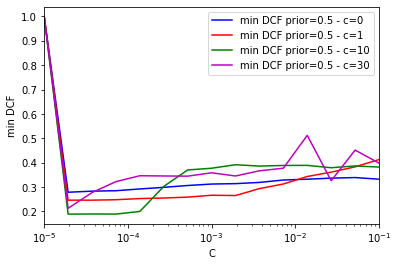

In [36]:
plotDCFpoly(C, minDCF3fold7, "C")

In [37]:
minDCF3fold6 = []
print("Start linear SVM with 3-fold on z normalized features with PCA=6")
for i in range(len(priors)):
    print("")
    print("Working on application with prior:", priors[i])
    for clittle in c:
        print("")
        print("Evaluating value of c:", clittle)
        for value in C:
            temp = utils.KfoldSVM(PCA6, L, model, option='polynomial', c = clittle, d = 2 ,C=value, prior=priors[i])
            minDCF3fold6.append(temp)
            print("For C=", value, "the minDCF is", temp)
print("")
print("END")

Start linear SVM with 3-fold on z normalized features with PCA=6

Working on application with prior: 0.5

Evaluating value of c: 0
For C= 1e-05 the minDCF is 1.0
For C= 1.9306977288832496e-05 the minDCF is 0.2799039701483523
For C= 3.727593720314938e-05 the minDCF is 0.28409832738042207
For C= 7.196856730011514e-05 the minDCF is 0.2863964571300993
For C= 0.00013894954943731373 the minDCF is 0.29376561690796077
For C= 0.00026826957952797245 the minDCF is 0.3001802775815009
For C= 0.0005179474679231213 the minDCF is 0.30849116573743357
For C= 0.001 the minDCF is 0.3128857980058736
For C= 0.0019306977288832496 the minDCF is 0.3154142515595686
For C= 0.003727593720314938 the minDCF is 0.3191156587583819
For C= 0.007196856730011514 the minDCF is 0.3294306494725615
For C= 0.013894954943731374 the minDCF is 0.3338712563555022
For C= 0.026826957952797246 the minDCF is 0.33811158820207254
For C= 0.05179474679231207 the minDCF is 0.3399609396069351
For C= 0.1 the minDCF is 0.3323432765206291

Ev

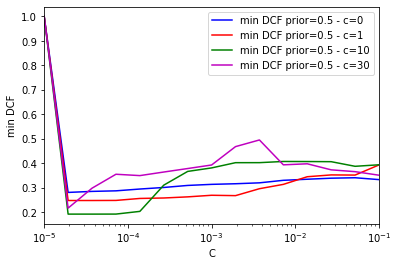

In [38]:
plotDCFpoly(C, minDCF3fold6, "C")